In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import mysql.connector as sql

In [2]:
# Data Gathering


In [3]:
mydb = sql.connect(host = 'localhost',
                   user = 'root',
                   passwd = '******', # use your PW
                   use_pure = True,
                    database='loan_data') # use your database
print(mydb)

In [4]:
mycursor = mydb.cursor()


In [5]:
mycursor.execute('show databases')
for db in mycursor:
    print(db)

('aditya',)
('db2',)
('information_schema',)
('loan_data',)
('myaditya',)
('mydatabase',)
('mysql',)
('new_schema',)
('performance_schema',)
('sql_hr',)
('sql_inventory',)
('sql_store',)
('sys',)
('velocity_new',)


In [6]:
mycursor.execute('select * from loan_data.simple_loan_data')
result = mycursor.fetchall()
for row in result:
    print(row)

('LP001002', 'Male', 'No', 0, 'Graduate', 'No', 5849, 0, '', 360, 1, 'Urban', 'Y')
('LP001003', 'Male', 'Yes', 1, 'Graduate', 'No', 4583, 1508, '128', 360, 1, 'Rural', 'N')
('LP001005', 'Male', 'Yes', 0, 'Graduate', 'Yes', 3000, 0, '66', 360, 1, 'Urban', 'Y')
('LP001006', 'Male', 'Yes', 0, 'Not Graduate', 'No', 2583, 2358, '120', 360, 1, 'Urban', 'Y')
('LP001008', 'Male', 'No', 0, 'Graduate', 'No', 6000, 0, '141', 360, 1, 'Urban', 'Y')
('LP001011', 'Male', 'Yes', 2, 'Graduate', 'Yes', 5417, 4196, '267', 360, 1, 'Urban', 'Y')
('LP001013', 'Male', 'Yes', 0, 'Not Graduate', 'No', 2333, 1516, '95', 360, 1, 'Urban', 'Y')
('LP001018', 'Male', 'Yes', 2, 'Graduate', 'No', 4006, 1526, '168', 360, 1, 'Urban', 'Y')
('LP001020', 'Male', 'Yes', 1, 'Graduate', 'No', 12841, 10968, '349', 360, 1, 'Semiurban', 'N')
('LP001024', 'Male', 'Yes', 2, 'Graduate', 'No', 3200, 700, '70', 360, 1, 'Urban', 'Y')
('LP001027', 'Male', 'Yes', 2, 'Graduate', '', 2500, 1840, '109', 360, 1, 'Urban', 'Y')
('LP001028', '

('LP002429', 'Male', 'Yes', 1, 'Graduate', 'Yes', 3466, 1210, '130', 360, 1, 'Rural', 'Y')
('LP002434', 'Male', 'Yes', 2, 'Not Graduate', 'No', 4652, 0, '110', 360, 1, 'Rural', 'Y')
('LP002435', 'Male', 'Yes', 0, 'Graduate', '', 3539, 1376, '55', 360, 1, 'Rural', 'N')
('LP002443', 'Male', 'Yes', 2, 'Graduate', 'No', 3340, 1710, '150', 360, 0, 'Rural', 'N')
('LP002444', 'Male', 'No', 1, 'Not Graduate', 'Yes', 2769, 1542, '190', 360, 0, 'Semiurban', 'N')
('LP002446', 'Male', 'Yes', 2, 'Not Graduate', 'No', 2309, 1255, '125', 360, 0, 'Rural', 'N')
('LP002447', 'Male', 'Yes', 2, 'Not Graduate', 'No', 1958, 1456, '60', 300, 0, 'Urban', 'Y')
('LP002448', 'Male', 'Yes', 0, 'Graduate', 'No', 3948, 1733, '149', 360, 0, 'Rural', 'N')
('LP002449', 'Male', 'Yes', 0, 'Graduate', 'No', 2483, 2466, '90', 180, 0, 'Rural', 'Y')
('LP002453', 'Male', 'No', 0, 'Graduate', 'Yes', 7085, 0, '84', 360, 1, 'Semiurban', 'Y')
('LP002455', 'Male', 'Yes', 2, 'Graduate', 'No', 3859, 0, '96', 360, 1, 'Semiurban', 'Y

In [7]:
df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
559,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
560,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
561,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [8]:
mycursor.execute('DESCRIBE loan_data.simple_loan_data')
result1  = mycursor.fetchall()
print(result1)

[('Loan_ID', b'text', 'YES', '', None, ''), ('Gender', b'text', 'YES', '', None, ''), ('Married', b'text', 'YES', '', None, ''), ('Dependents', b'int', 'YES', '', None, ''), ('Education', b'text', 'YES', '', None, ''), ('Self_Employed', b'text', 'YES', '', None, ''), ('ApplicantIncome', b'int', 'YES', '', None, ''), ('CoapplicantIncome', b'int', 'YES', '', None, ''), ('LoanAmount', b'text', 'YES', '', None, ''), ('Loan_Amount_Term', b'int', 'YES', '', None, ''), ('Credit_History', b'int', 'YES', '', None, ''), ('Property_Area', b'text', 'YES', '', None, ''), ('Loan_Status', b'text', 'YES', '', None, '')]


In [9]:
[[1,2,3],[5,6,7],[8,9,10]]

[[1, 2, 3], [5, 6, 7], [8, 9, 10]]

In [10]:
column_list = []
for column in result1:
    column_list.append(column[0])
print(column_list)
    

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [11]:
df = pd.DataFrame(result,columns=column_list)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
559,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
560,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
561,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [12]:
df = pd.read_csv('simple_loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df

In [ ]:
df.dropna()

In [19]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
import seaborn as sns
sns.displot(df['ApplicantIncome'])
plt.show()

In [ ]:
df['ApplicantIncome'].plot.box(figsize = (16,5))

In [ ]:
df.boxplot(column='ApplicantIncome',by = 'Education')


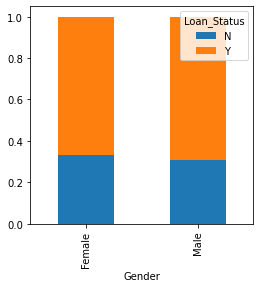

In [20]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

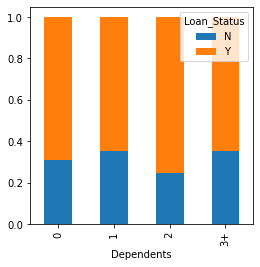

In [21]:
gender = pd.crosstab(df['Dependents'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()